In [2]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dexter = pd.read_csv('pokemon.csv' , encoding='utf-8')

In [4]:
dexter.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
dexter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
dexter.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
dexter.shape

(800, 13)

In [8]:
len(dexter['#'].unique())

721

In [9]:
len(dexter[dexter['Type 2'].isna()])

386

In [10]:
dexter['Legendary'].sum()

65

In [11]:
legendary = str((dexter['Legendary'].sum()/dexter.shape[0])*100) + '%'
print(legendary)

8.125%


<function matplotlib.pyplot.show(close=None, block=None)>

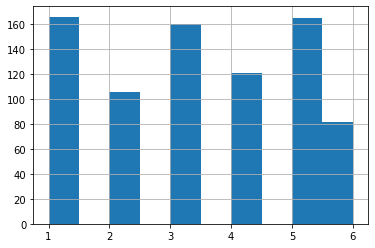

In [12]:
dexter['Generation'].hist()
plt.show

In [13]:
tipos =dict(collections.Counter(dexter['Type 1']))
total =dict()
total['Type 1'] = list(tipos.keys())
total['Count'] = list(tipos.values())

In [14]:
total = pd.DataFrame(total)
print(total)

      Type 1  Count
0      Grass     70
1       Fire     52
2      Water    112
3        Bug     69
4     Normal     98
5     Poison     28
6   Electric     44
7     Ground     32
8      Fairy     17
9   Fighting     27
10   Psychic     57
11      Rock     44
12     Ghost     32
13       Ice     24
14    Dragon     32
15      Dark     31
16     Steel     27
17    Flying      4


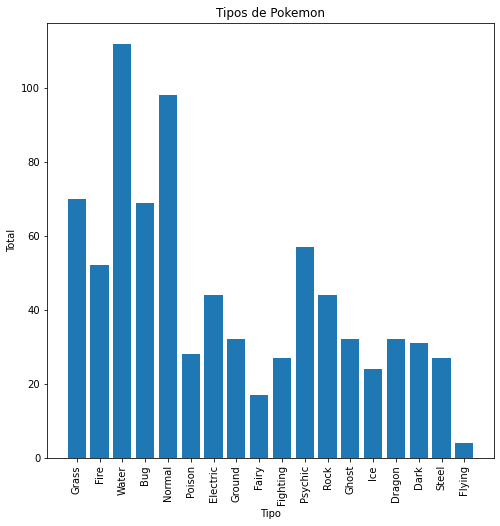

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(total['Type 1'], total['Count'])
plt.title('Tipos de Pokemon')
plt.xlabel('Tipo')
plt.ylabel('Total')

plt.xticks(rotation=90)
plt.show()

In [16]:
ataque = dexter.groupby('Name').max()['Attack']
ataque = ataque.sort_values(ascending=False)
display(ataque)

Name
MewtwoMega Mewtwo X        190
HeracrossMega Heracross    185
GroudonPrimal Groudon      180
DeoxysAttack Forme         180
RayquazaMega Rayquaza      180
                          ... 
Magikarp                    10
Shuckle                     10
Blissey                     10
Chansey                      5
Happiny                      5
Name: Attack, Length: 800, dtype: int64

In [17]:
dexter['Region']= dexter['Generation']

In [18]:
dexter['Region']=dexter['Region'].replace(1,'Kanto')
dexter['Region']=dexter['Region'].replace(2,'Johto')
dexter['Region']=dexter['Region'].replace(3,'Hoenn')
dexter['Region']=dexter['Region'].replace(4,'Sinnoh')
dexter['Region']=dexter['Region'].replace(5,'Teselia')
dexter['Region']=dexter['Region'].replace(6,'Kalos')
dexter

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Region
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Kanto
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Kanto
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Kanto
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Kanto
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Kanto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,Kalos
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,Kalos
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,Kalos
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,Kalos


In [19]:
dexter[(dexter['Type 1']== 'Water') & (dexter['Total']==dexter[dexter['Type 1']=='Water']['Total'].max())]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Region
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,Hoenn


In [20]:
typ = dict()
for key in dexter.keys().tolist():
    typ[key]=list()

In [21]:
for i in dexter['Type 1'].unique():
    aux = dexter[(dexter['Type 1']== i) & (dexter['Total']==dexter[dexter['Type 1']==i]['Total'].max())]
    if len(aux)==1:
        for key in dexter.keys().tolist():
            typ[key].append(aux.loc[aux.index[0]][key])
    else:
        for t in range(len(aux.index)):
            for key in dexter.keys().tolist():
                typ[key].append(aux.loc[aux.index[t]][key])

In [22]:
attackmax = pd.DataFrame(typ)
attackmax

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Region
0,254,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False,Hoenn
1,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,Johto
2,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,Hoenn
3,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False,Kanto
4,212,ScizorMega Scizor,Bug,Steel,600,70,150,140,65,100,75,2,False,Johto
5,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False,Johto
6,649,Genesect,Bug,Steel,600,71,120,95,120,95,99,5,False,Teselia
7,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True,Sinnoh
8,169,Crobat,Poison,Flying,535,85,90,80,70,80,130,2,False,Johto
9,181,AmpharosMega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False,Johto


In [23]:
attackmax =attackmax.sort_values(by=['Type 1'])
attackmax

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Region
3,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False,Kanto
4,212,ScizorMega Scizor,Bug,Steel,600,70,150,140,65,100,75,2,False,Johto
5,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False,Johto
6,649,Genesect,Bug,Steel,600,71,120,95,120,95,99,5,False,Teselia
23,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,Kalos
22,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,Hoenn
9,181,AmpharosMega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False,Johto
11,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True,Kalos
12,448,LucarioMega Lucario,Fighting,Steel,625,70,145,88,140,70,112,4,False,Sinnoh
1,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,Johto


In [24]:
attackmax.drop_duplicates(inplace=True)
attackmax

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Region
3,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False,Kanto
4,212,ScizorMega Scizor,Bug,Steel,600,70,150,140,65,100,75,2,False,Johto
5,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False,Johto
6,649,Genesect,Bug,Steel,600,71,120,95,120,95,99,5,False,Teselia
23,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,Kalos
22,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,Hoenn
9,181,AmpharosMega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False,Johto
11,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True,Kalos
12,448,LucarioMega Lucario,Fighting,Steel,625,70,145,88,140,70,112,4,False,Sinnoh
1,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,Johto


In [25]:
attackmax[attackmax['Legendary']]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Region
23,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,Kalos
22,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,Hoenn
11,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True,Kalos
1,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,Johto
26,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True,Teselia
25,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True,Teselia
18,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True,Sinnoh
17,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True,Sinnoh
10,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,Hoenn
19,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,Kanto


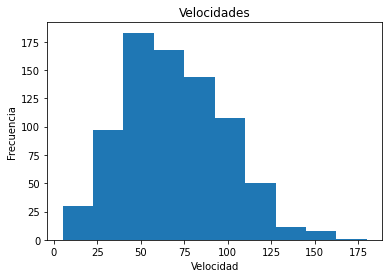

In [26]:
plt.hist(dexter['Speed'])
plt.title('Velocidades')
plt.ylabel('Frecuencia')
plt.xlabel('Velocidad')
plt.show()

In [27]:
fistats=dexter.groupby('Name').max()['Total']
fistats = fistats.sort_values(ascending=False)
fistats

Name
MewtwoMega Mewtwo Y      780
MewtwoMega Mewtwo X      780
RayquazaMega Rayquaza    780
KyogrePrimal Kyogre      770
GroudonPrimal Groudon    770
                        ... 
Wurmple                  195
Weedle                   195
Kricketot                194
Azurill                  190
Sunkern                  180
Name: Total, Length: 800, dtype: int64

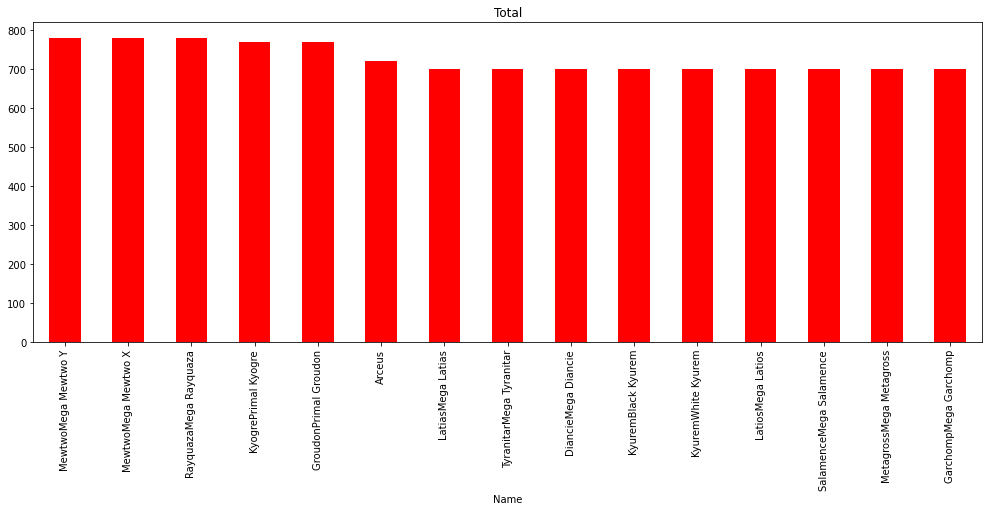

In [28]:
plt.figure(figsize=(17,20))
plt.subplot(311)
legendarios= fistats.head(15)
legendarios.plot(kind = 'bar',
subplots=True,
color='Red')
plt.show()

In [29]:
dexter.groupby('Type 1').agg(frequency=('Type 1', 'count'))*100/dexter.shape[0]

,frequency
Type 1,
Bug,8.625
Dark,3.875
Dragon,4.000
Electric,5.500
Fairy,2.125
Fighting,3.375
Fire,6.500
Flying,0.500
Ghost,4.000


In [30]:
dexter['Type 2']=dexter['Type 2'].fillna('Nada')

In [31]:
pd.crosstab(index= dexter['Type 1'], columns= dexter['Type 2'])

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Nada,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,,
Bug,0,0,0,2,0,2,2,14,1,6,2,0,17,0,12,0,3,7,1
Dark,0,0,3,0,0,2,3,5,2,0,0,2,10,0,0,2,0,2,0
Dragon,0,0,0,1,1,0,1,6,0,0,5,3,11,0,0,4,0,0,0
Electric,0,0,1,0,1,0,1,5,1,1,0,1,27,2,0,0,0,3,1
Fairy,0,0,0,0,0,0,0,2,0,0,0,0,15,0,0,0,0,0,0
Fighting,0,1,0,0,0,0,0,1,0,0,0,0,20,0,0,3,0,2,0
Fire,0,0,1,0,0,7,0,6,0,0,3,0,28,2,0,2,1,1,1
Flying,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
Ghost,0,1,2,0,0,0,3,2,0,10,0,0,10,0,4,0,0,0,0


In [32]:
pd.crosstab(index= dexter['Type 1'], columns= dexter['Type 2'], margins=True)

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Nada,Normal,Poison,Psychic,Rock,Steel,Water,All
Type 1,,,,,,,,,,,,,,,,,,,,
Bug,0,0,0,2,0,2,2,14,1,6,2,0,17,0,12,0,3,7,1,69
Dark,0,0,3,0,0,2,3,5,2,0,0,2,10,0,0,2,0,2,0,31
Dragon,0,0,0,1,1,0,1,6,0,0,5,3,11,0,0,4,0,0,0,32
Electric,0,0,1,0,1,0,1,5,1,1,0,1,27,2,0,0,0,3,1,44
Fairy,0,0,0,0,0,0,0,2,0,0,0,0,15,0,0,0,0,0,0,17
Fighting,0,1,0,0,0,0,0,1,0,0,0,0,20,0,0,3,0,2,0,27
Fire,0,0,1,0,0,7,0,6,0,0,3,0,28,2,0,2,1,1,1,52
Flying,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,4
Ghost,0,1,2,0,0,0,3,2,0,10,0,0,10,0,4,0,0,0,0,32
